In [1]:
import numpy as np
import random

class Node:
    curr = 0; #used for name...sequence number of a person
    def __init__(self, index):
        self.index = index
        self.dead = False
        self.parent = None
        self.name = str(Node.curr)
        self.childs = []
        self.friends = []
        Node.curr = Node.curr+1
    
    def add_child(self, c):
        self.childs.append(c)
        c.parent = self
        
    def kill_me(self):
        self.dead = True
        
    def add_friend(self, n):
        self.friends.append(n)
        n.friends.append(self)
    
    def get_friends(self):
        return [f for f in self.friends if not f.dead]
        
    def count_friends(self):
        return len([f for f in self.friends if not f.dead])

    def __repr__(self):
        res = self.name
        
        if self.friends:
#             friend_names = map(lambda c: c.name if not c.dead else c.name + ' (dead)', self.friends)
            friends = filter(lambda f: not f.dead, self.friends)
            friend_names = map(lambda f: f.name, friends)
#             res = res + " friends: [" + ", ".join(friend_names)+"]"
            res = res + " friends: " + str(len(friend_names))
        
        if self.parent:
            res = res + ' parent: ' + self.parent.name
            if self.parent.dead:
                res = res + ' (dead)'
        
        if self.childs:
            child_names = map(lambda c: c.name if not c.dead else c.name + ' (dead)', self.childs)
            res = res + " childs: [" + ", ".join(child_names)+"]"
        
        return res

In [2]:
def step(nodes, pb, pr, pn):
    # kill random node and make a baby on it place
    # with random parent
    
    # find random mother and random dead soul
    dead_index = random.randrange(0,N)
    parent_index = random.choice(range(0, dead_index) + range(dead_index+1, N)) # excludes dead index
    
    baby = Node(dead_index)
    nodes[dead_index].kill_me()
    nodes[dead_index] = baby
    nodes[parent_index].add_child(baby)
    
#     print 'dead idx ' + str(dead_index) + ' parent idx ' + str(parent_index)+ ' baby name ' + baby.name 

    # find friends
    parent_friends_indexes = [n.index for n in nodes[parent_index].get_friends()]
    for i in xrange(0,N):
        n = nodes[i]
        
        if i == dead_index:
            continue # it's me .. i am not friend of myself...am i?
        
        if i == parent_index:
            if random.random()<pb: baby.add_friend(n)
            continue
        
        if i in parent_friends_indexes:
            if random.random()<pn: baby.add_friend(n)
            continue
            
        #else
        if random.random()<pr:
            baby.add_friend(n)
    

In [4]:
%%time
def run(pb, pr, pn):
    # init population
    Node.curr = 0
    nodes = [Node(i) for i in xrange(N)]

    #run steps
    for _ in xrange(steps):
        step(nodes, pb, pr, pn)

        
    return sum([n.count_friends() for n in nodes])/N #degree

def run_n_times(pb,pr,pn):
    return sum([run(pb,pr,pn) for _ in range(20)])/20

N = 100 # num of nodes
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr05

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr03

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr01
    

[33, 34, 34, 36, 38, 39, 42, 42, 45, 48, 49, 53, 56, 57, 63, 66, 71, 73, 84, 90, 99]
[23, 24, 25, 25, 28, 29, 31, 31, 33, 36, 38, 40, 43, 47, 48, 56, 60, 67, 74, 84, 99]
[9, 10, 11, 10, 11, 12, 12, 15, 16, 17, 16, 21, 22, 23, 27, 29, 35, 42, 48, 67, 98]
CPU times: user 13.6 s, sys: 201 ms, total: 13.8 s
Wall time: 13.9 s


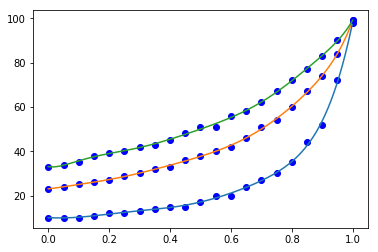

In [12]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()